In [1]:
# Set up imports
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
from pathlib import Path
import seaborn as sns
import os

In [2]:
# Import CSV
filepath = "Resources/student_health_data.csv"
dirty_data = pd.read_csv(filepath)

# Check it
dirty_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student_ID                1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Heart_Rate                1000 non-null   float64
 4   Blood_Pressure_Systolic   1000 non-null   float64
 5   Blood_Pressure_Diastolic  1000 non-null   float64
 6   Stress_Level_Biosensor    1000 non-null   float64
 7   Stress_Level_Self_Report  1000 non-null   float64
 8   Physical_Activity         1000 non-null   object 
 9   Sleep_Quality             1000 non-null   object 
 10  Mood                      1000 non-null   object 
 11  Study_Hours               1000 non-null   float64
 12  Project_Hours             1000 non-null   float64
 13  Health_Risk_Level         1000 non-null   object 
dtypes: float6

In [3]:
dirty_data.head()

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,1,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956,Moderate
1,2,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154,Moderate
2,3,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437,Moderate
3,4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High
4,5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate


In [4]:
clean_data = dirty_data

In [5]:
clean_data.head()

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,1,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956,Moderate
1,2,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154,Moderate
2,3,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437,Moderate
3,4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High
4,5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate


In [6]:
clean_data=clean_data.drop(columns=['Student_ID'])
clean_data

,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956,Moderate
1,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154,Moderate
2,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437,Moderate
3,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High
4,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23,F,68.185217,126.031324,69.156288,8.318278,6.841725,Moderate,Moderate,Stressed,30.554113,9.491591,Moderate
996,18,F,77.720216,100.627116,75.569051,6.295881,4.152130,High,Poor,Happy,29.285850,22.819961,High
997,24,M,85.313237,124.362792,91.817614,2.896868,9.253887,Moderate,Good,Happy,15.330941,19.010784,Moderate
998,21,M,79.212477,106.370246,77.218808,3.130484,2.205774,Low,Poor,Neutral,31.921143,9.159565,Low


In [7]:
# This cell brought to you by Xpert AI
sleep_mapping = {
    'Poor': 0,
    'Moderate': .5,
    'Good': 1
    }

clean_data.Sleep_Quality = clean_data.Sleep_Quality.map(sleep_mapping)

In [8]:
# This cell brought to you by Xpert AI
health_mapping = {
    'Low': 0,
    'Moderate': .5,
    'High': 1
    }

clean_data.Health_Risk_Level = clean_data.Health_Risk_Level.map(health_mapping)

In [9]:
# This cell brought to you by Xpert AI
mood_mapping = {
    'Stressed': 0,
    'Neutral': .5,
    'Happy': 1
    }

clean_data.Mood = clean_data.Mood.map(mood_mapping)

In [10]:
# This cell brought to you by Xpert AI
gender_mapping = {
    'F': 0,
    'M': 1
    }

clean_data.Gender = clean_data.Gender.map(gender_mapping)

In [11]:
clean_data.Physical_Activity.unique()

array(['High', 'Moderate', 'Low'], dtype=object)

In [12]:
# This cell brought to you by Xpert AI
Physical_Activity_mapping = {
    'Low': 0,
    'Moderate': .5,
    'High': 1
    }

clean_data.Physical_Activity = clean_data.Physical_Activity.map(Physical_Activity_mapping)

In [13]:
clean_data.head()

,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,24,1,50.663217,122.173015,84.419860,3.137350,9.028669,1.0,0.5,1.0,34.520973,16.800956,0.5
1,21,0,57.926042,110.778407,75.696145,3.699078,5.819697,0.5,1.0,0.0,16.763846,15.791154,0.5
2,22,1,59.294219,109.375673,83.803814,6.785156,5.892360,0.0,0.5,1.0,44.203798,25.678437,0.5
3,24,1,76.826232,125.142227,78.091587,6.408509,6.884001,1.0,0.0,1.0,21.776645,20.808391,1.0
4,20,1,68.342769,107.515592,80.674937,7.264719,4.483450,0.5,0.0,1.0,8.964999,15.194045,0.5


In [14]:
# custom pallette instructions for matplotlib from https://www.google.com/search?client=firefox-b-1-d&q=how+to+change+matplotlib+color+palette

colors = ["#2568E4", "#1E80C7", "#1697AA", "#0EAF8D", "#06C670", "#36AA60", "#668E50", "#967240", "#C55530"]
plt.rcParams['axes.prop_cycle'] = plt.cycler('color', colors)

In [15]:
# custom pallette instructions for seaborn from https://www.google.com/search?client=firefox-b-1-d&q=seaborn+set+color+palette

# make palette
custom_palette = ["#2568E4", "#1E80C7", "#1697AA", "#0EAF8D", "#06C670", "#36AA60", "#668E50", "#967240", "#C55530"]
# Set the palette
sns.set_palette(custom_palette)

In [16]:
Royal_Blue = "#2568E4"
Steel_Blue = "#1E80C7"
Blue_Munsell = "#1697AA"
Jungle_Green = "#0EAF8D"
Emerald = "#06C670"
Pigment_Green = "#36AA60"
Asparagus = "#668E50"
Golden_Brown = "#967240"
Sinopia = "#C55530"

In [17]:
corrs = clean_data.corr()
corrs

,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
Age,1.000000,0.012753,0.021002,-0.007643,0.009554,0.036973,0.013957,0.070762,-0.049382,-0.020719,-0.071895,-0.022001,0.061216
Gender,0.012753,1.000000,0.034927,-0.051583,0.051489,-0.054610,0.015193,-0.038764,-0.072798,-0.042359,0.031767,0.012211,0.010485
Heart_Rate,0.021002,0.034927,1.000000,0.010487,-0.029246,0.045965,-0.030244,-0.032250,0.013073,0.006758,0.042154,0.002522,-0.031566
Blood_Pressure_Systolic,-0.007643,-0.051583,0.010487,1.000000,0.023070,-0.029756,-0.024142,0.064994,0.019597,0.050629,-0.004735,-0.031142,-0.025919
Blood_Pressure_Diastolic,0.009554,0.051489,-0.029246,0.023070,1.000000,-0.003564,-0.013975,0.039236,0.009135,-0.005814,-0.009838,-0.025889,-0.006184
Stress_Level_Biosensor,0.036973,-0.054610,0.045965,-0.029756,-0.003564,1.000000,-0.025881,0.045201,0.041389,-0.003741,-0.029895,0.007518,0.508138
Stress_Level_Self_Report,0.013957,0.015193,-0.030244,-0.024142,-0.013975,-0.025881,1.000000,-0.040846,-0.029302,0.019973,-0.004504,0.025306,0.486826
Physical_Activity,0.070762,-0.038764,-0.032250,0.064994,0.039236,0.045201,-0.040846,1.000000,-0.016273,0.029331,0.061010,0.036672,0.153886
Sleep_Quality,-0.049382,-0.072798,0.013073,0.019597,0.009135,0.041389,-0.029302,-0.016273,1.000000,-0.026096,-0.016803,0.058283,-0.161852
Mood,-0.020719,-0.042359,0.006758,0.050629,-0.005814,-0.003741,0.019973,0.029331,-0.026096,1.000000,0.024212,0.052340,0.035983


In [18]:
# This cell brought to you by Xpert AI

# Create the output directory if it doesn't exist
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

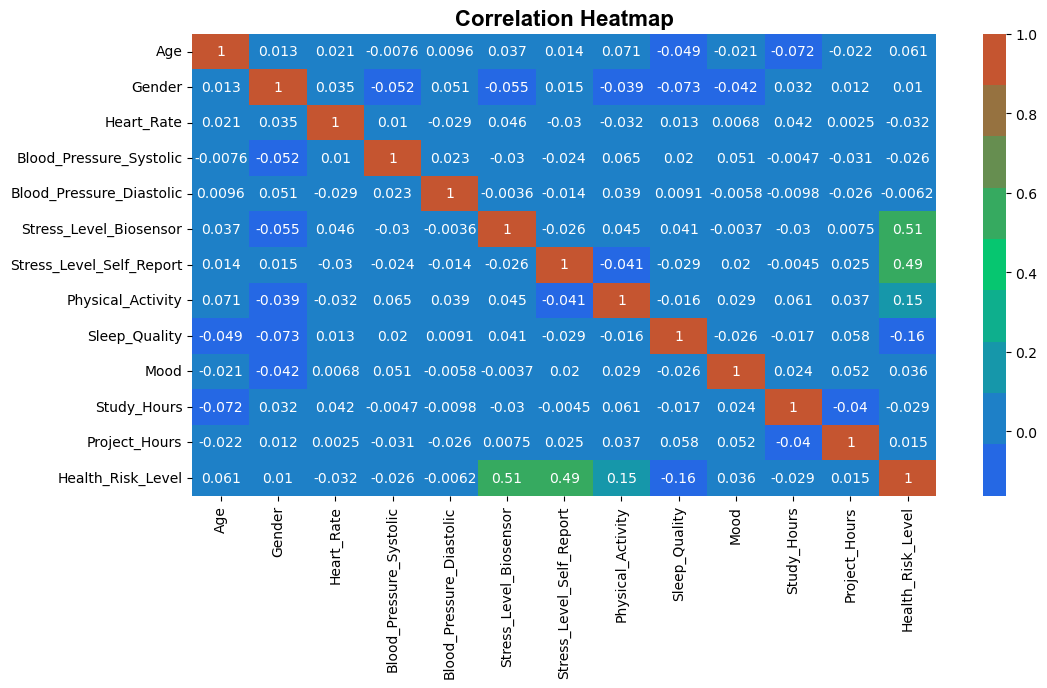

In [19]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# make palette
#custom_palette = ["#2568E4", "#1E80C7", "#1697AA", "#0EAF8D", "#06C670", "#36AA60", "#668E50", "#967240", "#C55530"]
# Set the palette
#sns.set_palette(custom_palette)
# Create a basic plot
sns.heatmap(corrs, annot=True, cmap = custom_palette)
# Customization
plt.title("Correlation Heatmap", fontweight="bold", fontsize=16, fontfamily="Arial")

# Show/Save the Graph
plt.savefig(os.path.join(output_dir, "big_heatmap"))
plt.show()